In [36]:
import sys
import os
import math
import dlib
import glob
from skimage import io
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.color import rgb2gray, gray2rgb


MODEL = "shape_predictor_68_face_landmarks.dat"

In [14]:
%matplotlib inline
import autoanime

In [19]:
def dist(p1,p2):
    return math.sqrt(sum([pow(c1-c2,2) for (c1,c2) in zip(p1,p2)]))
def crop_wrapper(x, y, x_plus, y_plus, im):
    """crops image centered at (x,y) by (x_plus, y_plus) in each direction."""
    print "xplus, yplus: ", x_plus, y_plus
    return im.crop((x-x_plus, y-y_plus, x+x_plus, y+y_plus))

In [20]:
def find_eyebrows(shape, orig_im):
    """returns cropped eyebrows."""
    
    l_eyebrow = [shape.part(17),shape.part(18),shape.part(19),shape.part(20),shape.part(21)]
    r_eyebrow = [shape.part(22),shape.part(23),shape.part(24),shape.part(25),shape.part(26)]

    min_left_eyebrow = min([p.y for p in l_eyebrow])
    min_right_eyebrow = min([p.y for p in r_eyebrow])

    max_left_eye = max(shape.part(37).y, shape.part(38).y)
    max_right_eye = max(shape.part(43).y, shape.part(44).y)

    left_offset = abs(min_left_eyebrow - max_left_eye)
    right_offset = abs(min_right_eyebrow - max_right_eye)

    left_x_offset = max(abs(shape.part(19).x - shape.part(17).x), abs(shape.part(19).x - shape.part(21).x))
    right_x_offset = max(abs(shape.part(24).x - shape.part(22).x), abs(shape.part(24).x - shape.part(26).x))

    left_offset = int(left_offset / 1.5)
    right_offset = int(right_offset / 1.5)

    cropped_left = crop_wrapper(shape.part(19).x, shape.part(19).y, left_x_offset, left_offset, orig_im)
    cropped_right = crop_wrapper(shape.part(24).x, shape.part(24).y, right_x_offset, right_offset, orig_im)

    return cropped_left, cropped_right

xplus, yplus:  20 8
xplus, yplus:  19 8


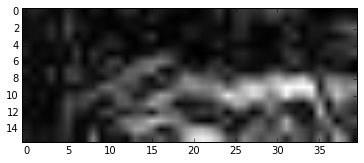

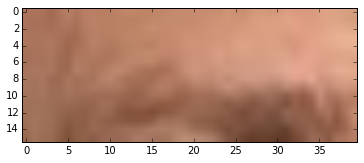

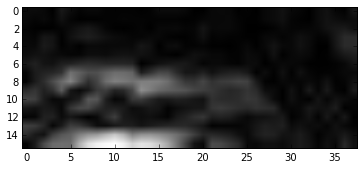

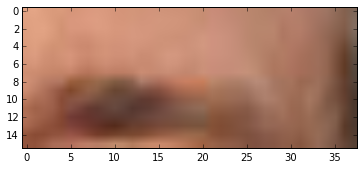

16 40
8


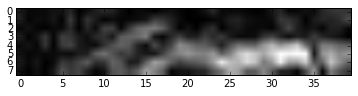

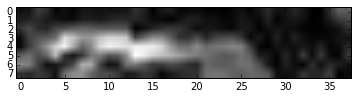

finall!  0.0275719565273


In [102]:
#main stuff
fname = 'm.jpg'
shape = autoanime.predict_shape(fname) #CHANGE
orig_im = Image.open(fname)
new_im = Image.new("RGB", (orig_im.size[0], orig_im.size[1]), color=(255,255,255))

#REMEMBER PTS ARE 0 INDEXED
l_eyebrow = [shape.part(17),shape.part(18),shape.part(19),shape.part(20),shape.part(21)]
r_eyebrow = [shape.part(22),shape.part(23),shape.part(24),shape.part(25),shape.part(26)]

min_left_eyebrow = min([p.y for p in l_eyebrow])
min_right_eyebrow = min([p.y for p in r_eyebrow])

max_left_eye = max(shape.part(37).y, shape.part(38).y)
max_right_eye = max(shape.part(43).y, shape.part(44).y)

left_offset = abs(min_left_eyebrow - max_left_eye)
right_offset = abs(min_right_eyebrow - max_right_eye)

left_x_offset = max(abs(shape.part(19).x - shape.part(17).x), abs(shape.part(19).x - shape.part(21).x))
right_x_offset = max(abs(shape.part(24).x - shape.part(22).x), abs(shape.part(24).x - shape.part(26).x))

left_offset = int(left_offset / 1.5)
right_offset = int(right_offset / 1.5)

cropped_left = crop_wrapper(shape.part(19).x, shape.part(19).y, left_x_offset, left_offset, orig_im)
cropped_right = crop_wrapper(shape.part(24).x, shape.part(24).y, right_x_offset, right_offset, orig_im)

cropped_left.show()
cropped_right.show()

render_big_eyebrows(cropped_left, cropped_right)


In [100]:
def render_big_eyebrows(left, right): 
    """returns true/false if big eyebrows should be drawn or not."""
    left = np.asarray(left)
    right = np.asarray(right)
    l_gradient = np.gradient(rgb2gray(left))
    r_gradient = np.gradient(rgb2gray(right))

    energy_1 = np.zeros((left.shape[0], left.shape[1]))
    energy_r = np.zeros((right.shape[0], right.shape[1]))
    energy_l = abs(l_gradient[0]) 
    energy_r = abs(r_gradient[0]) 
    
    plt.imshow(energy_l,  cmap=cm.Greys_r)
    plt.show()
    plt.imshow(left)
    plt.show()
    plt.imshow(energy_r,  cmap=cm.Greys_r)
    plt.show()
    plt.imshow(right)
    plt.show()
    
    h, w = energy_l.shape
    mid_h = h / 2
    #not sure about these thresholds
    cropped_l = energy_l[mid_h-(h/4):mid_h+(h/4), :]
    cropped_r = energy_r[mid_h-(h/4):mid_h+(h/4), :]
    
    plt.imshow(cropped_l,  cmap=cm.Greys_r)
    plt.show()
    plt.imshow(cropped_r,  cmap=cm.Greys_r)
    plt.show()
    
    s_l = cropped_l.sum() / (cropped_l.shape[0] * cropped_l.shape[1]) 
    s_r = cropped_r.sum() / (cropped_r.shape[0] * cropped_r.shape[1])
    fin_avg = (s_l + s_r) / 2. 
#     print 'finall! ', fin_avg
    if fin < 0.02:
        return False
    else:
        return True
    

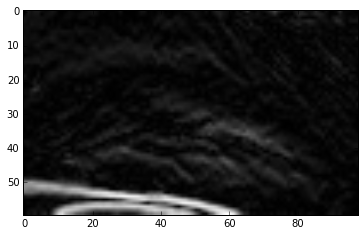

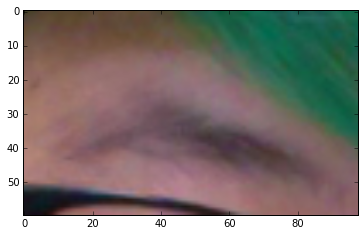

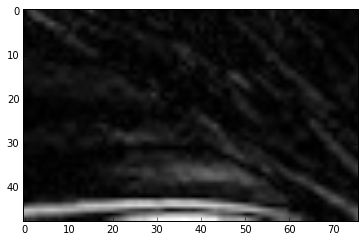

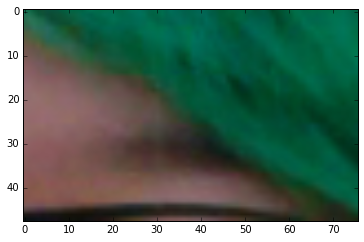

60 98
30


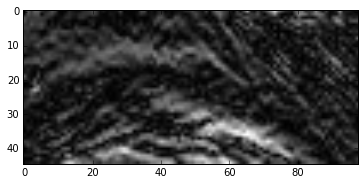

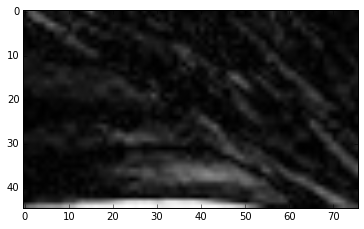

0.0105811378774 0.014320412166


In [90]:
render_big_eyebrows(cropped_left, cropped_right)